In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
df = pd.read_csv('CHEMBL25-chembl_activity-JAK3.tsv', header=0, sep='\t')
df.head(2)

,Molecule,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Comment,Compound Key,Assay,Assay Description,...,Published Relation,Published Value,Published Units,Canonical Smiles,Data Validity Comment,Document Journal,Document Year,SRC ID,UO Units,Potential Duplicate
0,CHEMBL1983006,Ki,>,1584.89,nM,NaN,inactive,SID103904900,CHEMBL1963742,PUBCHEM_BIOASSAY: Navigating the Kinome. (Clas...,...,NaN,NaN,NaN,COc1cc(C(=O)O)c(Cl)cc1NC(=O)Nc2cnc(cn2)C#N,NaN,NaN,NaN,7,UO_0000065,False
1,CHEMBL2007559,Ki,>,5011.87,nM,NaN,inactive,SID103905005,CHEMBL1963742,PUBCHEM_BIOASSAY: Navigating the Kinome. (Clas...,...,NaN,NaN,NaN,CCCNC(=O)c1ccc(Nc2nc(NCC(F)(F)F)c3sccc3n2)cc1,NaN,NaN,NaN,7,UO_0000065,False


In [2]:
from rdkit.Chem import PandasTools

,Molecule,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Comment,Compound Key,Assay,Assay Description,...,Published Units,Canonical Smiles,Data Validity Comment,Document Journal,Document Year,SRC ID,UO Units,Potential Duplicate,ROMol,Class
0,CHEMBL1983006,Ki,>,1584.89,nM,NaN,inactive,SID103904900,CHEMBL1963742,PUBCHEM_BIOASSAY: Navigating the Kinome. (Class of assay: other) Panel member name: JAK3,...,NaN,COc1cc(C(=O)O)c(Cl)cc1NC(=O)Nc2cnc(cn2)C#N,NaN,NaN,NaN,7,UO_0000065,False,,0
1,CHEMBL2007559,Ki,>,5011.87,nM,NaN,inactive,SID103905005,CHEMBL1963742,PUBCHEM_BIOASSAY: Navigating the Kinome. (Class of assay: other) Panel member name: JAK3,...,NaN,CCCNC(=O)c1ccc(Nc2nc(NCC(F)(F)F)c3sccc3n2)cc1,NaN,NaN,NaN,7,UO_0000065,False,,0

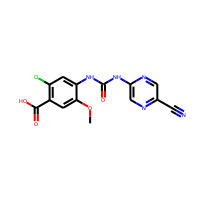
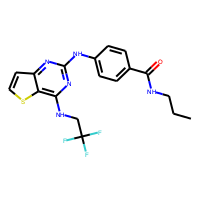

In [3]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Canonical Smiles")
df['Class'] = np.where(df.Comment =='inactive', 0, 1)
df.head(2)

In [4]:
PandasTools.WriteSDF(df, 'CHEMBL25-chembl_activity-JAK3.sdf', properties=df.columns)

In [5]:
df.columns

Index(['Molecule', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Comment', 'Compound Key', 'Assay',
       'Assay Description', 'BAO Format', 'Target', 'Target Pref. Name',
       'Target Organism', 'Target Type', 'Document', 'Source', 'Max Phase',
       '#Ro5 Violations', 'Molecular Weight', 'Ligand Efficiency BEI',
       'Ligand Efficiency LE', 'Ligand Efficiency LLE',
       'Ligand Efficiency SEI', 'ALogP', 'Assay Organism',
       'Assay Tissue ChEMBL ID', 'Assay Tissue Name', 'Assay Cell Type',
       'Assay Subcellular Fraction', 'Organism Tax ID', 'BAO Format ID',
       'Published Type', 'Published Relation', 'Published Value',
       'Published Units', 'Canonical Smiles', 'Data Validity Comment',
       'Document Journal', 'Document Year', 'SRC ID', 'UO Units',
       'Potential Duplicate', 'ROMol', 'Class'],
      dtype='object')

In [6]:
df.Molecule

0      CHEMBL1983006
1      CHEMBL2007559
2      CHEMBL1992363
3       CHEMBL234085
4      CHEMBL1994830
5      CHEMBL2005631
6      CHEMBL1966175
7      CHEMBL1969664
8      CHEMBL2004438
9      CHEMBL1992581
10      CHEMBL260092
11         CHEMBL554
12      CHEMBL215152
13     CHEMBL1970083
14     CHEMBL1976240
15     CHEMBL1987009
16     CHEMBL2000801
17     CHEMBL2007002
18     CHEMBL1987007
19     CHEMBL2007151
20     CHEMBL1682545
21     CHEMBL1975903
22      CHEMBL482967
23      CHEMBL583144
24     CHEMBL1982660
25     CHEMBL1971947
26      CHEMBL412142
27     CHEMBL1992231
28     CHEMBL2002723
29     CHEMBL1983393
           ...      
870      CHEMBL24828
871     CHEMBL306380
872     CHEMBL491473
873     CHEMBL296586
874    CHEMBL1976040
875      CHEMBL38380
876     CHEMBL522892
877     CHEMBL574738
878    CHEMBL1983268
879    CHEMBL1870106
880    CHEMBL1973720
881     CHEMBL191003
882    CHEMBL1975128
883    CHEMBL1940137
884    CHEMBL1986943
885         CHEMBL10
886     CHEMB

In [10]:
result = pd.read_csv('../svc_rf_gp_output/optuna_svc_rf.csv', header=1)

In [15]:
result.sort_values('test_arcc', ascending=False)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,classifier,rf_max_depth,svc_c,svc_gamma,test_arcc,test_error,train_acc,train_error,uuid,val_acc,_number
16,16,16,TrialState.COMPLETE,0.200000,2019-06-18 22:02:47.169348,2019-06-18 22:02:48.979594,SVC,NaN,7.221305e+03,1.907887e-02,0.800000,0.200000,0.997222,0.002778,9f280919-31cf-40db-921b-85916c35b5e3,0.216632,16
0,0,0,TrialState.COMPLETE,0.216667,2019-06-18 22:02:19.740744,2019-06-18 22:02:23.206707,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,0b3e313e-0f26-444c-877b-c6f548300280,0.249966,0
15,15,15,TrialState.COMPLETE,0.216667,2019-06-18 22:02:44.971267,2019-06-18 22:02:47.159137,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,2b87ae07-02b9-461b-9ec3-2cfd16332122,0.249966,15
47,47,47,TrialState.COMPLETE,0.216667,2019-06-18 22:03:32.542369,2019-06-18 22:03:34.780375,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,38a62ff9-323b-40ee-87b2-9d3ccd5b4a33,0.249966,47
45,45,45,TrialState.COMPLETE,0.216667,2019-06-18 22:03:28.656780,2019-06-18 22:03:30.873618,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,f02eed52-24dd-4a2c-86ef-300d3f73c62e,0.249966,45
43,43,43,TrialState.COMPLETE,0.216667,2019-06-18 22:03:26.139444,2019-06-18 22:03:28.373341,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,3092efb3-0cf5-408c-a1d9-51d513a5cb89,0.249966,43
41,41,41,TrialState.COMPLETE,0.216667,2019-06-18 22:03:21.813688,2019-06-18 22:03:24.037341,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,383621d0-e98f-48a1-8912-501a6d733680,0.249966,41
40,40,40,TrialState.COMPLETE,0.216667,2019-06-18 22:03:19.603166,2019-06-18 22:03:21.798719,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,473e29a4-cb94-47c5-8500-65474b5690e9,0.249966,40
37,37,37,TrialState.COMPLETE,0.216667,2019-06-18 22:03:15.989643,2019-06-18 22:03:18.196465,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,9c97801f-0e50-4719-9437-aca5c5724243,0.249966,37
33,33,33,TrialState.COMPLETE,0.216667,2019-06-18 22:03:09.810656,2019-06-18 22:03:12.010288,GP,NaN,NaN,NaN,0.783333,0.216667,0.997222,0.002778,11263e94-e411-403c-8605-a711e3b7ab7c,0.249966,33
